# Indentifying Interactions with Random Forest
<br>
A collection of tools and techniques for learning about how a random forest makes predictions. 

In [5]:
#imports
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from celluloid import Camera

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

## Generate data

In [23]:
#functions
def generate_row():
    """
    Generate one random employee for the dataset
    """
    
    experience = random.randint(0,40)
    degree = int(random.random() < 0.75)
    performance = round(random.random()*10,2)
    sales = random.randint(0,100)
    days_late = random.randint(0,20)
    
    return {'experience':experience, 
            'degree':degree, 
            'performance':performance,
            'sales':sales,
           'days_late':days_late}

def bonus_row(employee,a=0,b=20,c=5,d=2,e=1/5,f=1/5,g=-1):
    """
    bonus an employee based on employee data
    """
    bonus = 0
    
    bonus+=a*employee['experience']
    bonus+=b*employee['degree']
    bonus+=c*employee['experience']*employee['degree']
    bonus+= d*employee['performance']
    bonus+= e*employee['sales']
    bonus+= f*employee['sales']*employee['performance']
    bonus+= g*employee['days_late']
    
    bonus += random.randint(-20,20)
    
    return round(bonus)

employee=generate_row()
print(employee)
bonus_row(employee)

{'experience': 27, 'degree': 1, 'performance': 4.74, 'sales': 72, 'days_late': 7}


244

In [39]:
data_dics = []
for i in range(1000):
    random_employee = generate_row()
    bonus = bonus_row(random_employee)
    random_employee['bonus'] = max(bonus,0)
    data_dics.append(random_employee)
    
data  = pd.DataFrame(data_dics,columns=['experience', 'degree','performance', 'sales','days_late', 'bonus']) 

In [40]:
data.to_csv('../data/interaction_dataset.csv',index=False)

In [6]:
data = pd.read_csv('../data/interaction_dataset.csv')
data.head()

,"experience ""degree"" ""performance"" ""sales"" ""days_late"" ""bonus"""
0,31\t1\t6.11\t29\t14\t197
1,35\t1\t9.55\t44\t8\t314
2,9\t1\t2.64\t26\t20\t88
3,40\t1\t0.22\t13\t7\t233
4,18\t1\t6.46\t11\t13\t108


In [ ]:
data.ilo

## Explore Data

In [42]:
data.describe()

,experience,degree,performance,sales,days_late,bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20.166000,0.746000,4.999380,49.998000,9.881000,151.39800
std,11.914126,0.435515,2.838202,29.072138,6.028863,88.88103
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.00000
25%,10.000000,0.000000,2.607500,24.000000,5.000000,81.50000
50%,20.000000,1.000000,5.040000,51.000000,10.000000,151.50000
75%,30.000000,1.000000,7.370000,75.000000,15.000000,211.00000
max,40.000000,1.000000,9.990000,100.000000,20.000000,410.00000


### degree-experience interaction

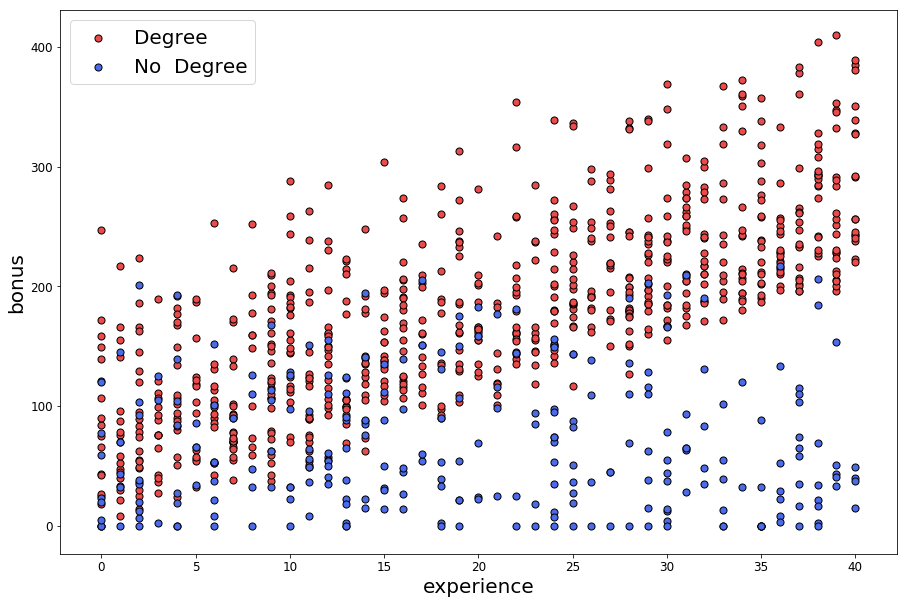

In [45]:
data_original = data.copy(deep=True)
color = ['#eb4b4b','#eba64b','#ebd84b','#9beb4b','#4bebb3','#4bc0eb','#4b6beb','#a64beb','#de4beb','#eb4b8b']

plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter('experience','bonus',c=color[0],s=50,edgecolors='#000000',data=data_original[data_original.degree == 1])
plt.scatter('experience','bonus',c=color[6],s=50,edgecolors='#000000',data=data_original[data_original.degree == 0])
plt.ylabel("bonus",size=20)
plt.xlabel('experience',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.legend(['Degree','No  Degree'],loc =2,prop={"size":20})

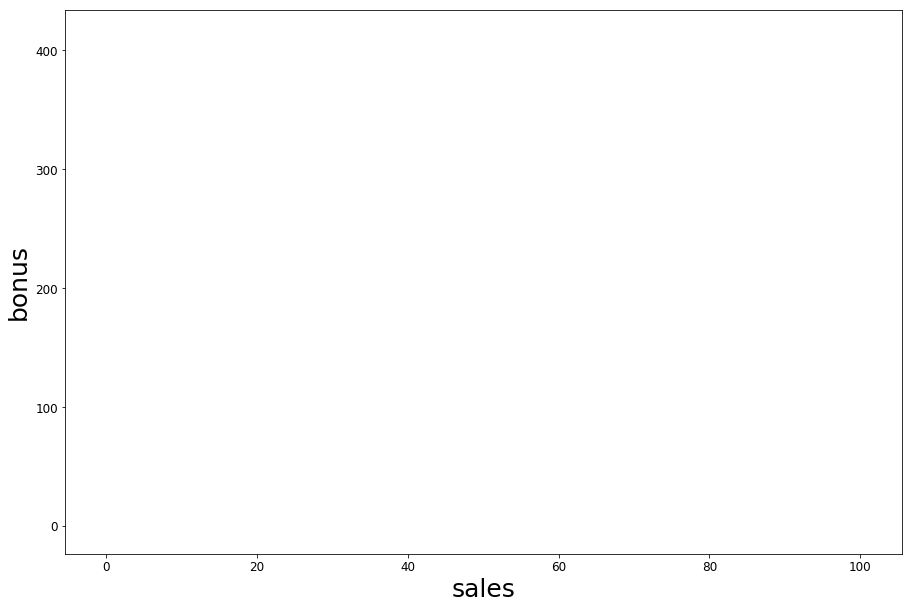

In [50]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt


color = ['#eb4b4b','#eba64b','#ebd84b','#9beb4b','#4bebb3','#4bc0eb','#4b6beb','#a64beb','#de4beb','#eb4b8b']

data_original = data.copy(deep=True)
data_original['perf'] = [math.floor(x) for x in data_original['performance']]
data_original.head()


fig = plt.figure(figsize=(15,10))

camera = Camera(fig)
for i in range(10):
    p = plt.scatter('sales','bonus',c=color[i],s=50,edgecolors='#000000',data=data_original[data_original.perf==i])
    plt.ylabel("bonus",size=25)
    plt.xlabel('sales',size=25)
    #plt.title("Performance range: {}-{}".format(i,i+1),size=30)
    leg = plt.legend(labels=["Performance: {}-{}".format(i,i+1)],loc=2,fontsize = 30,frameon=False)
    leg.legendHandles[0].set_color(color[i])
    plt.yticks(size=12)
    plt.xticks(size=12)
    camera.snap()
a = camera.animate()

a.save("../figures/prom_sales_interaction.gif", writer='pillow', fps=2,dpi=150)


## Random Forest - Promotion

In [9]:
features = ['experience', 'degree', 'performance', 'sales']
X = data[features]
y = data['promotion']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)
# Fitting the model
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

# Prediction and evaluation
train_preds = rfc.predict(x_train)
test_preds = rfc.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)
print("Train:{} Test:{}".format(round(train_accuracy*100,2),round(test_accuracy*100,2)))

# Prediction and evaluation
print(classification_report(y_test,test_preds))

# Create confusion matrix
print(confusion_matrix(y_test,test_preds))

Train:100.0 Test:95.67
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       237
           1       0.92      0.87      0.89        63

    accuracy                           0.96       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.96      0.96      0.96       300

[[232   5]
 [  8  55]]


In [14]:
print('Computing partial dependence plots...')
#tic = time()
display = plot_partial_dependence(
    rfc,x_train, features,kind='both')
#print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with Gradient Boosting'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

Computing partial dependence plots...


TypeError: plot_partial_dependence() got an unexpected keyword argument 'kind'

# Cover Image

In [ ]:
[3,4,5,6,7,8,9,10,1,2] [3,2,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]        10,9,8,7,6,5,4,3,4,5,6,7,8,9,10,1,2]

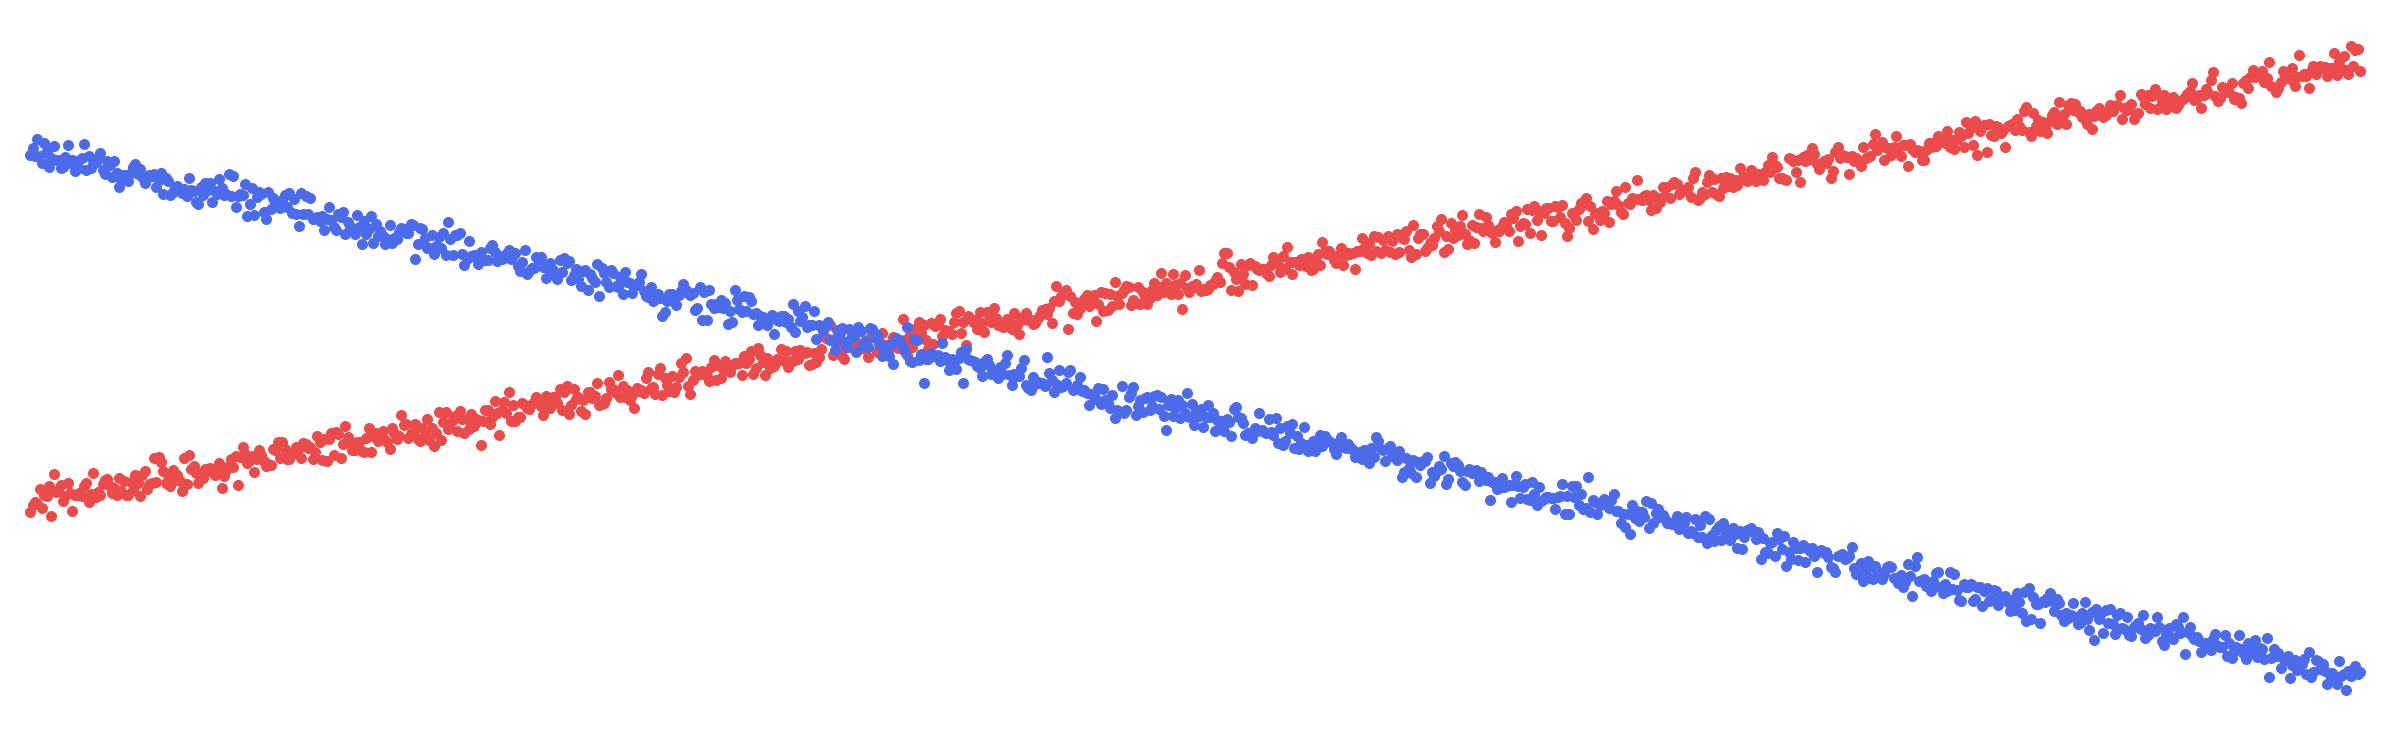

In [2]:
x = np.linspace(0,1,1000)

i = 4

x = np.linspace(0,1,1000)



fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(33,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
x = np.linspace(0,1,1000)
y1 = (1/2)*x -i/10 + np.random.randn(1000)*0.01 
y2 = -((10-i)/10)*x+ np.random.randn(1000)*0.01 
plt.scatter(x,y1,c=color[0],s= 100)
plt.scatter(x,y2,c=color[6],s= 100)

# Hide grid lines
ax.grid(False)

# Hide axes ticks
plt.xlim(-0.01, 1.01) 
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
plt.savefig("../figures/rf_cover.png")

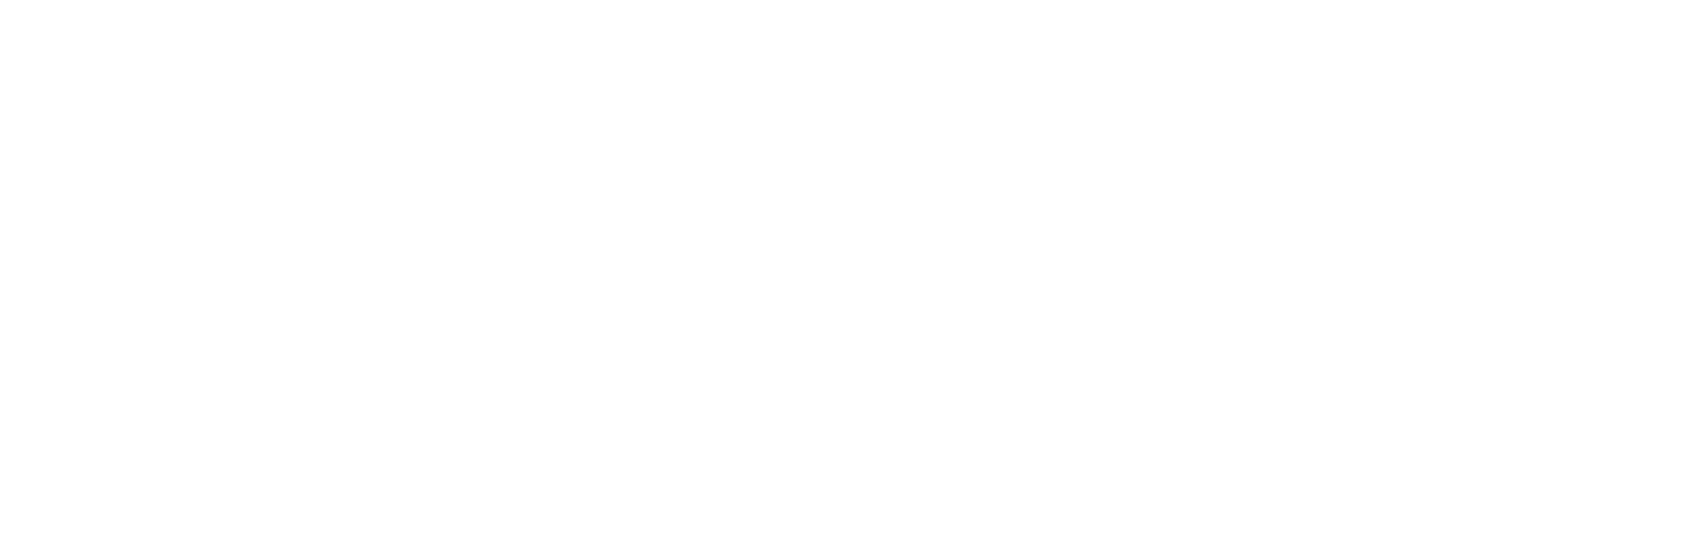

In [3]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt


color = ['#eb4b4b','#eba64b','#ebd84b','#9beb4b','#4bebb3','#4bc0eb','#4b6beb','#a64beb','#de4beb','#eb4b8b']
fig = plt.figure(figsize=(23,7))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
camera = Camera(fig)
for i in [3,2,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]:
    x = np.linspace(0,1,1000)
    y1 = (1/2)*x -i/10 + np.random.randn(1000)*0.1 
    y2 = -((10-i)/10)*x+ np.random.randn(1000)*0.1 
    plt.scatter(x,y1,c=color[0],s= 100)
    plt.scatter(x,y2,c=color[6],s= 100)
    ax.grid(False)
    plt.xlim(-0.01, 1.01) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    camera.snap()
a = camera.animate()

a.save("../figures/rf_cover.gif",writer='pillow', fps=2,dpi=10)

# Archive

In [ ]:
data_original = data.copy(deep=True)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter('performance','bonus',c='#ff2121',s=50,edgecolors='#000000',data=data_original)
plt.ylabel("bonus",size=20)
plt.xlabel('performance',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

In [ ]:
#Relationship with promotion
df = data.copy(deep=True)
df['experience'] = [math.floor(x/5)*5 for x in df['experience']]
exp = range(0,40,5)
deg_0 = []
deg_1 = []
for i in exp:
    df_0 = df[(df.experience == i) & (df.degree==0)]
    df_1 = df[(df.experience == i) & (df.degree==1)]
    
    prop_0 = sum(df_0.promotion)/len(df_0)
    prop_1 = sum(df_1.promotion)/len(df_1)
    
    deg_0.append(prop_0)
    deg_1.append(prop_1)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.plot(exp,deg_1,c=color[0],lw=3, label='Degree')
plt.plot(exp,deg_0,c=color[6],lw=3, label='No Degree')

plt.ylabel("Promotion Proportion",size=20)
plt.xlabel('Experience',size=20)
plt.yticks(size=12)
labels = ["{}-{}".format(e,e+5) for e in exp]
plt.xticks(exp,labels, size=12)


plt.legend(loc =2,prop={"size":20})

In [ ]:
#Relationship with promotion
df = data.copy(deep=True)
df['sales'] = [math.floor(x/10)*10 for x in df['sales']]
df['performance'] = [math.floor(x/2)*2 for x in df['performance']]
df.head()

sales = range(0,100,10)

def promotion_prop(perf=0): 
    
    prop = []
    for i in sales:
        
        df_i = df[(df.sales ==i) & (df.performance == perf)]
        p = 0
        if len(df_i) != 0: 
            p = sum(df_i.promotion)/len(df_i)
        
        prop.append(p) 
        
    return prop
promotion_prop(8)

In [ ]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))
for i in range(0,10,2):
    plt.plot(sales,promotion_prop(i),c=color[i],lw=3,label="{}-{}".format(i,i+2))
leg = plt.legend(title = "Performance Range", loc =2,prop={"size":15},fontsize=20)
plt.setp(leg.get_title(),fontsize=15)
plt.ylabel("Promotion Proportion",size=20)
plt.xlabel('Sales',size=20)
plt.yticks(size=12)
labels = ["{}-{}".format(s,s+10) for s in sales]
plt.xticks(sales,labels, size=12)